# The Pythagorean Expectation

The Pythagorean expectation is an idea devised by the famous baseball analyst, Bill James, but it can in fact be applied to any sport.

In any sports league, teams win games by accumulating a higher total than  opponent. In baseball and cricket the relevant totals are runs, in basketball it is points, and in soccer and hockey it is goals (by "hockey" we mean here what the world outside of the US and Canada usually calls ice hockey, but in fact the same is true in field hockey).

The Pythagorean expectation can be described thus: in any season, the percentage of games won will be proportional to the square of total runs/points/goals scored by the team *squared* divided by the sum of total runs/points/goals scored by the team *squared* plus total runs/points/goals conceded by the team *squared*.

or *wpc = T<sub>F</sub><sup>2</sup> / ( T<sub>F</sub><sup>2</sup> + T<sub>A</sub><sup>2</sup> )*

Where T<sub>F</sub> is runs/points/goals scored and T<sub>A</sub> is runs/points/goals conceded.

This is a concept which can help to explain not only why teams are successful, but also can be used as the basis for predicting results in the future.

In this first week we are going to derive the Pythagorean expectation for five leagues in five different sports:

Major League Baseball
The English Premier League (soccer)
The Indian Premier League (cricket)
The National Basketball Association (NBA)
The National Hockey League (NHL)


## Coding the data

To derive the Pythagorean Expectation we will need to manipulate the data, which is a core skill that we expect you to obtain from these MOOCs. However, for this first week, we move quite quickly through the code, since our main objective is to show you the kinds of analysis you will be able to produce once you master Python.

In [1]:
# Here are the packages we need

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
MLB = pd.read_excel("MLB_game_log_2018.xlsx")
print(MLB.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [3]:
MLB.head()

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,...,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y


In [4]:
# For the Pythagorean Expectation we need only runs scored and conceded. Of course, we also need the names of the teams.
# and the date will also be useful. We put these into a new dataframe (df) which we call MLB18.
# The variable names are rather lengthy, so to make life easier we can rename columns to give them short names.
# If we want to see what the data looks like, we can just type the name of the df.

MLB18 = MLB[['VisitingTeam', 'HomeTeam', 'VisitorRunsScored', 'HomeRunsScore', 'Date']]
MLB18 = MLB18.rename(columns=dict(
    VisitingTeam='Visitor',
    HomeTeam='Home',
    VisitorRunsScored='VisitorScore',
    HomeRunsScore='HomeScore'
))
MLB18.head()

,Visitor,Home,VisitorScore,HomeScore,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329


In [5]:
# We will need to know who won the game - which we can tell by who scored the more runs, the home team or the visiting teams
#(there are no ties in baseball)
# The variable 'hwin' is defined here as equaling 1 if the home team scored more runs, and zero otherwise. 
# The variable 'awin' is defined in a similar way for the away team.
# we also create a 'counter' variable = 1 for each row.

MLB18["hwin"] = np.where(MLB18['HomeScore']>MLB18['VisitorScore'], 1, 0)
MLB18["awin"] = np.where(MLB18['VisitorScore']>MLB18['HomeScore'], 1, 0)
MLB18['count']=1
MLB18.head()

,Visitor,Home,VisitorScore,HomeScore,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1
1,PHI,ATL,5,8,20180329,1,0,1
2,SFN,LAN,1,0,20180329,0,1,1
3,CHN,MIA,8,4,20180329,0,1,1
4,SLN,NYN,4,9,20180329,1,0,1


Since our data refers to games, for each game there are two teams - but what we want is is a list of runs scored and conceded by each team and its win percentage. To create this we are going to define two dfs, one for the home teams and for away teams, which we can then merge to get the stats for the entire season.

In [6]:
test_df_v = MLB18[MLB18.Visitor == "COL"]
test_df_h = MLB18[MLB18.Home == "COL"]

total_v_score = test_df_v.VisitorScore.sum()
total_h_score = test_df_h.HomeScore.sum()
total_score = total_v_score + total_h_score

total_v_conceded = test_df_v.HomeScore.sum()
total_h_conceded = test_df_h.VisitorScore.sum()
total_conceded = total_v_conceded + total_h_conceded
print(f"Total Score: {total_score} -- Total conceded: {total_conceded}")

visitor_win = len(test_df_v[test_df_v['awin'] == 1])
home_win = len(test_df_h[test_df_h['hwin'] == 1])
total_win = visitor_win + home_win
total_games = len(test_df_v) + len(test_df_h)
win_ratio = total_win / total_games
win_ratio

pythagorean_exp = total_score**2 / (total_score**2 + total_conceded**2)

print(f"Win ratio is: {win_ratio} -- Pythagorean Expectation is: {pythagorean_exp}")

Total Score: 780 -- Total conceded: 745
Win ratio is: 0.558282208588957 -- Pythagorean Expectation is: 0.5229387369190107


In [7]:
def compare_for_team(df, team):
    df_v = df[df.Visitor == team]
    df_h = df[df.Home == team]
    total_v_score = df_v.VisitorScore.sum()
    total_h_score = df_h.HomeScore.sum()
    total_score = total_v_score + total_h_score
    
    total_v_conceded = df_v.HomeScore.sum()
    total_h_conceded = df_h.VisitorScore.sum()
    total_conceded = total_v_conceded + total_h_conceded
    
    visitor_win = len(df_v[df_v['awin'] == 1])
    home_win = len(df_h[df_h['hwin'] == 1])
    total_win = visitor_win + home_win
    total_games = len(df_v) + len(df_h)
    win_ratio = total_win / total_games
    pythagorean_exp = total_score**2 / (total_score**2 + total_conceded**2)
    print(f"Team: {team}")
    print("Home Record:")
    print(f"games: {len(df_h)} win: {home_win}, score: {total_h_score} conceded: {total_h_conceded}")
    print("Visitor Record")
    print(f"games: {len(df_v)} win: {visitor_win}, score: {total_v_score} conceded: {total_v_conceded}")
    print(f"Win ratio: {win_ratio} -- Pythagorean Expectation: {pythagorean_exp}")
    return


compare_for_team(df=MLB18, team="PHI")

Team: PHI
Home Record:
games: 81 win: 49, score: 370 conceded: 347
Visitor Record
games: 81 win: 31, score: 307 conceded: 381
Win ratio: 0.49382716049382713 -- Pythagorean Expectation: 0.4637488326066742


In [8]:
MLBHome = MLB18.groupby("Home")['hwin', 'HomeScore', 'VisitorScore', 'count'].sum().reset_index()
MLBHome.rename(columns=dict(Home="team", HomeScore="scoreH", VisitorScore="concedeH"), inplace=True)
MLBVisitor = MLB18.groupby("Visitor")["awin", "VisitorScore", "HomeScore", "count"].sum().reset_index()
MLBVisitor.rename(columns=dict(Visitor="team", VisitorScore="scoreV", HomeScore="concedeV"), inplace=True)

/tmp/ipykernel_566184/1239373676.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBHome = MLB18.groupby("Home")['hwin', 'HomeScore', 'VisitorScore', 'count'].sum().reset_index()
/tmp/ipykernel_566184/1239373676.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  MLBVisitor = MLB18.groupby("Visitor")["awin", "VisitorScore", "HomeScore", "count"].sum().reset_index()


In [9]:
main_df = pd.merge(MLBHome, MLBVisitor, on="team")
main_df["scoreT"] = main_df["scoreH"] + main_df["scoreV"]
main_df["concedeT"] = main_df["concedeH"] + main_df["concedeV"]
main_df["winR"] = (main_df["hwin"] + main_df["awin"]) / (main_df["count_x"] + main_df["count_y"])
main_df["pyth_exp"] = main_df["scoreT"]**2 / (main_df["scoreT"]**2 + main_df["concedeT"]**2 )
main_df

,team,hwin,scoreH,concedeH,count_x,awin,scoreV,concedeV,count_y,scoreT,concedeT,winR,pyth_exp
0,ANA,42,355,355,81,38,366,367,81,721,722,0.493827,0.499307
1,ARI,40,359,328,81,42,334,316,81,693,644,0.506173,0.536600
2,ATL,43,391,357,81,47,368,300,81,759,657,0.555556,0.571662
3,BAL,28,339,411,81,19,283,481,81,622,892,0.290123,0.327161
4,BOS,57,468,322,81,51,408,325,81,876,647,0.666667,0.647037
5,CHA,30,321,409,81,32,335,439,81,656,848,0.382716,0.374388
6,CHN,51,385,349,82,44,376,296,81,761,645,0.582822,0.581946
7,CIN,37,385,418,81,30,311,401,81,696,819,0.413580,0.419344
8,CLE,49,443,334,81,42,375,314,81,818,648,0.561728,0.614423
9,COL,47,445,404,81,44,335,341,82,780,745,0.558282,0.522939


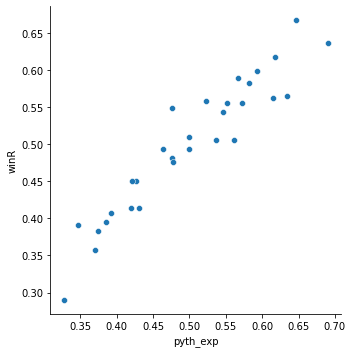

In [10]:
sns.relplot(x="pyth_exp", y="winR", data=main_df)

In [11]:
# Finally we generate a regression.

pyth_lm = smf.ols(formula = 'winR ~ pyth_exp', data=main_df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   winR   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           3.54e-15
Time:                        13:39:21   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth_exp       0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""